## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:	Yotam 1393
# student 2:    Roei 9740
# studentt 3:	Raziel 1405
# student 4:   	John Doe 0000

## Part 2 - Experiments
You could add as many code cells as needed

#### IMPORT

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


#### LOAD TRAIN & TEST 

In [3]:
# Load datasets
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')

# Print the first 5 rows of the datasets
print(train_df.head(5))
print()
print(test_df.head(5))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


#### VISUALIZE


Train Dataset Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000  

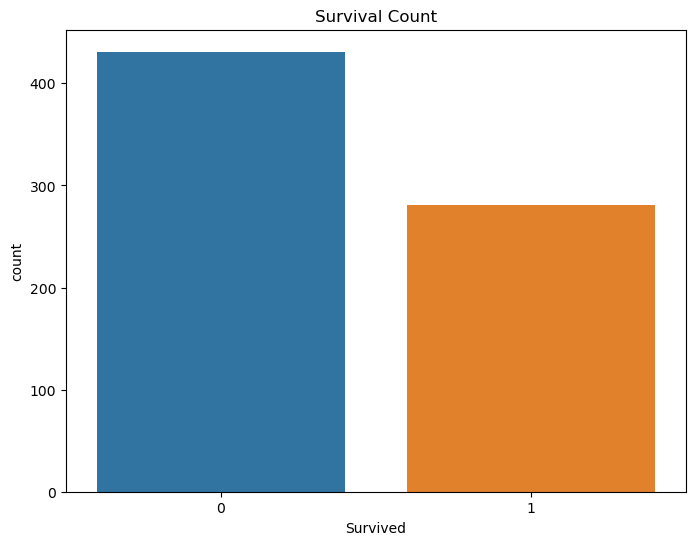

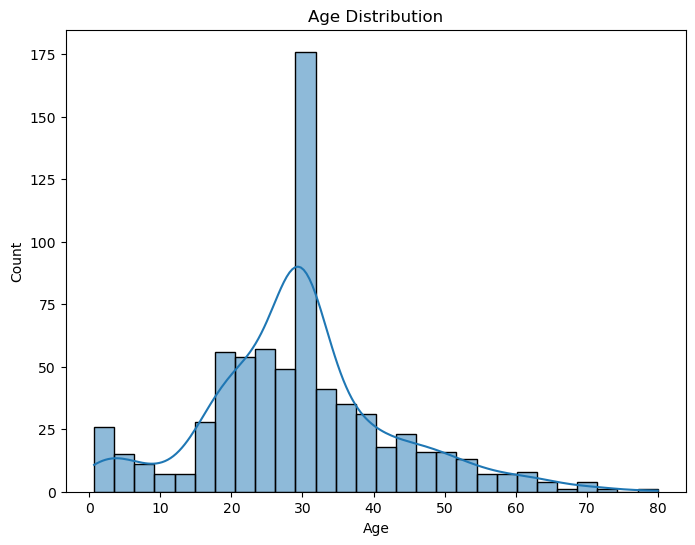

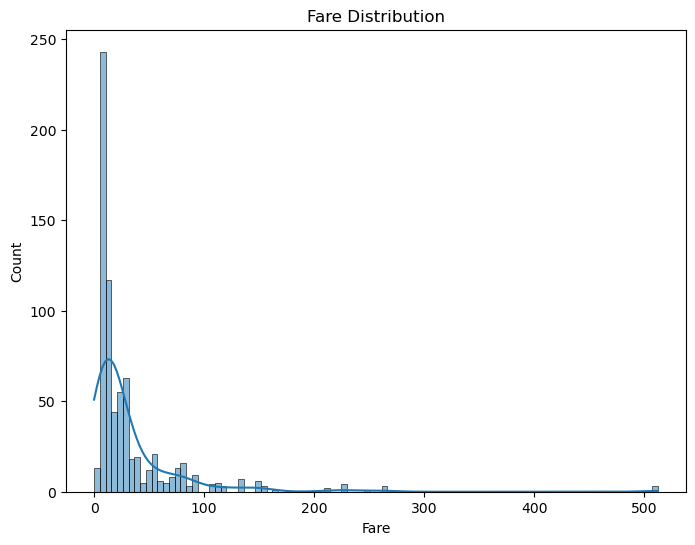

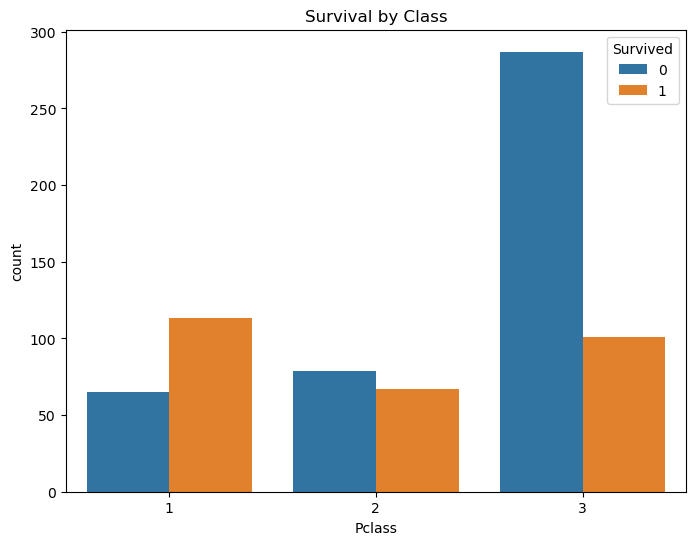

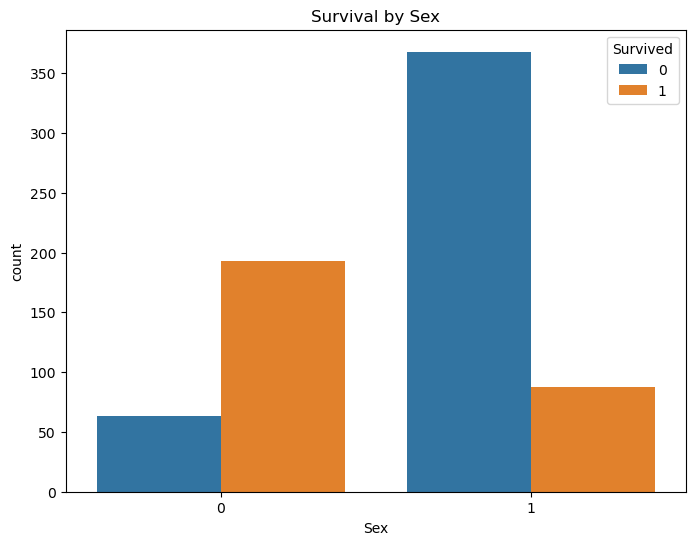

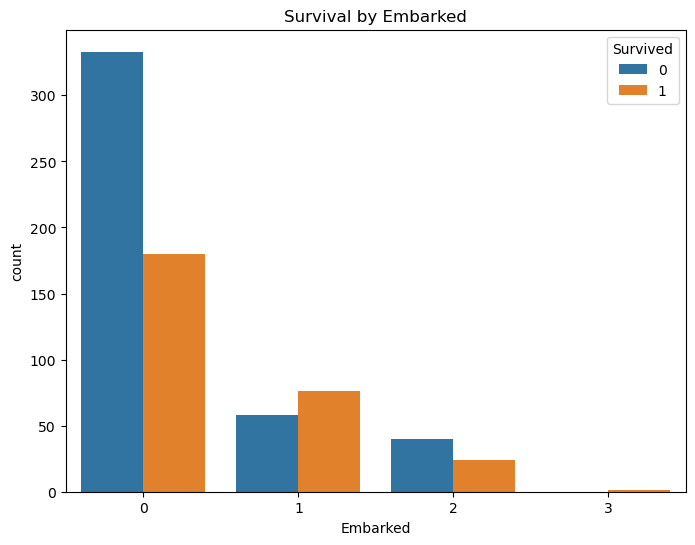

In [4]:
# Basic statistics
print("\nTrain Dataset Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing values in Train Dataset:")
print(train_df.isnull().sum())

# Visualizations
# Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.show()

# Survival by Class
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

# Survival by Embarked
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarked')
plt.show()

#### FEATURE ENGINEERING

In [5]:
# turn Pclass into different columns
train_df = pd.get_dummies(train_df, columns=['Pclass'])
train_df.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

test_df = pd.get_dummies(test_df, columns=['Pclass'])
test_df.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

print(train_df.head())
print(train_df.head())

   Sex   Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0    0  54.0      1      0  78.2667         1         1        1         0   
1    0  45.0      0      0  13.5000         0         1        0         1   
2    1  20.0      0      0   9.5000         0         0        0         0   
3    1  36.0      0      0   7.8958         0         0        0         0   
4    1  22.0      0      0   8.0500         0         0        0         0   

   Economy  
0        0  
1        0  
2        1  
3        1  
4        1  
   Sex   Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0    0  54.0      1      0  78.2667         1         1        1         0   
1    0  45.0      0      0  13.5000         0         1        0         1   
2    1  20.0      0      0   9.5000         0         0        0         0   
3    1  36.0      0      0   7.8958         0         0        0         0   
4    1  22.0      0      0   8.0500         0         0        

In [6]:
# turn Sex into different columns male, female
train_df = pd.get_dummies(train_df, columns=['Sex'])
train_df.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

print(train_df.head())
print(train_df.head())


    Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0  54.0      1      0  78.2667         1         1        1         0   
1  45.0      0      0  13.5000         0         1        0         1   
2  20.0      0      0   9.5000         0         0        0         0   
3  36.0      0      0   7.8958         0         0        0         0   
4  22.0      0      0   8.0500         0         0        0         0   

   Economy  Male  Female  
0        0     1       0  
1        0     1       0  
2        1     0       1  
3        1     0       1  
4        1     0       1  
    Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0  54.0      1      0  78.2667         1         1        1         0   
1  45.0      0      0  13.5000         0         1        0         1   
2  20.0      0      0   9.5000         0         0        0         0   
3  36.0      0      0   7.8958         0         0        0         0   
4  22.0      0      0   8.0500    

In [7]:
# create a new column 'Age_Class' which bins the age into 4 categories: 'child' 0-12 , 'teenager' 12-18, 'adult' 18-60, 'senior' 60-120

train_df = train_df.copy()
train_df['Age_Class'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
train_df = pd.get_dummies(train_df, columns=['Age_Class'])
train_df.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)

test_df = test_df.copy()
test_df['Age_Class'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
test_df = pd.get_dummies(test_df, columns=['Age_Class'])
test_df.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)

print(train_df.head())

    Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0  54.0      1      0  78.2667         1         1        1         0   
1  45.0      0      0  13.5000         0         1        0         1   
2  20.0      0      0   9.5000         0         0        0         0   
3  36.0      0      0   7.8958         0         0        0         0   
4  22.0      0      0   8.0500         0         0        0         0   

   Economy  Male  Female  Child  Teenager  Adult  Senior  
0        0     1       0      0         0      1       0  
1        0     1       0      0         0      1       0  
2        1     0       1      0         0      1       0  
3        1     0       1      0         0      1       0  
4        1     0       1      0         0      1       0  


#### VISUALIZE NEW COLUMNS

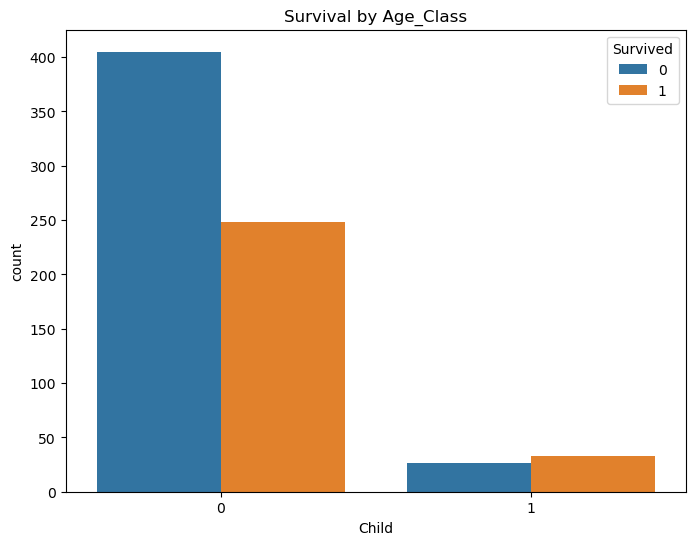

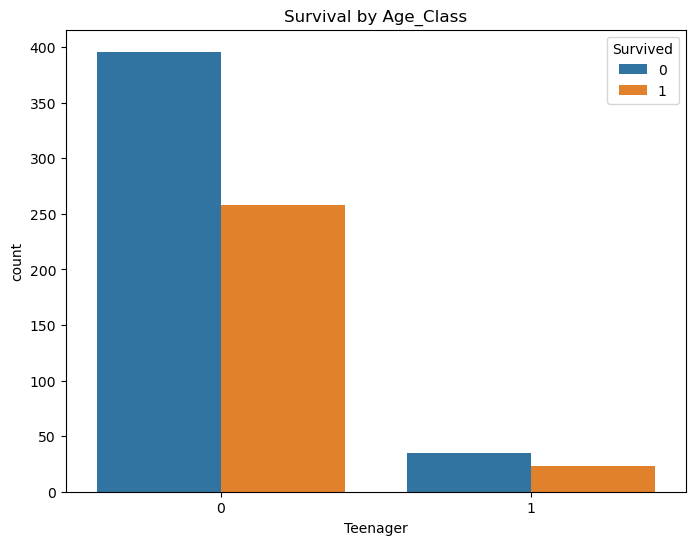

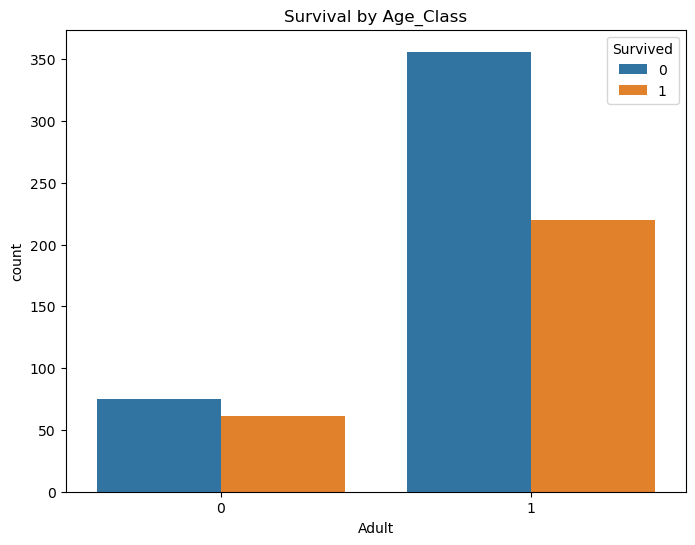

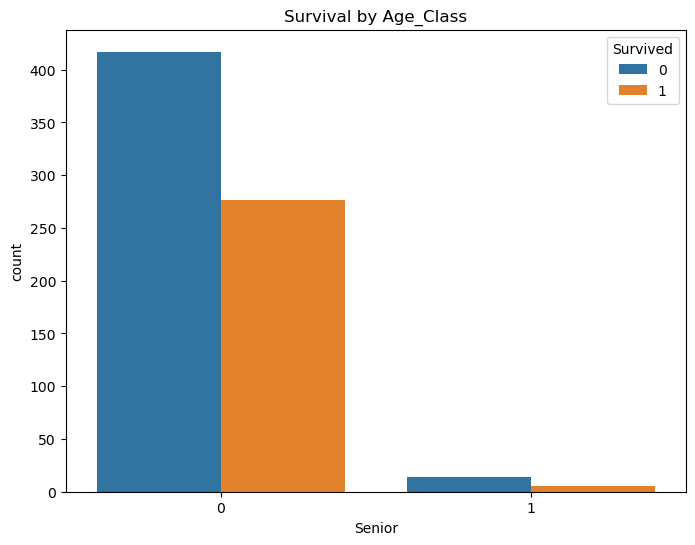

In [8]:
# Visualize the new columns

# Survival by Child
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Child', hue='Survived')
plt.title('Survival by Age_Class')
plt.show()

# Survival by Teenager
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Teenager', hue='Survived')
plt.title('Survival by Age_Class')
plt.show()

# Survival by Adult
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Adult', hue='Survived')
plt.title('Survival by Age_Class')
plt.show()

# Survival by Senior
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Senior', hue='Survived')
plt.title('Survival by Age_Class')
plt.show()

### ALGORITHMS

#### PRE-PIPES

In [9]:
num_features = ['Age', 'Fare']
cat_features = ['Premium', 'Buisness', 'Economy', 'Male', 'Female', 'Child', 'Teenager', 'Adult', 'Senior', 'Embarked']

# Create transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=np.nan))])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Target variable is 'Survived'
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

#### DECISION TREES

In [10]:
param_grid = {'classifier__random_state': [42],
			  'classifier__max_depth': [3, 5, 7, 9, 11],
			  'classifier__min_samples_split': [2, 5, 10, 20],
			  'classifier__min_samples_leaf': [1, 2, 4, 5, 8]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', DecisionTreeClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)



Best cross-validation score:  0.795685777743873
Best parameters:  {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__random_state': 42}


In [11]:
# Create a pipeline that combines the preprocessor with a classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5, min_samples_split=5))])

# Fit the pipeline to the training data
clf.fit(X_train, y_train)

# Use the pipeline to predict labels for the test data
predictions = clf.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score: ", f1)


F1 Score:  0.8069456427955134


#### KNN

In [19]:
param_grid = {'classifier__n_neighbors': list(range(1, 30)),
			  'classifier__weights': ['uniform', 'distance'],
			  'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
			  'classifier__p': [1, 2, 3]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', KNeighborsClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)



Best cross-validation score:  0.7822423898281263
Best parameters:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}


In [15]:
# Create a pipeline that combines the preprocessor with a classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
					  ('classifier', KNeighborsClassifier(n_neighbors=4, weights='uniform'))])

# Fit the pipeline to the training data
clf.fit(X_train, y_train)

# Use the pipeline to predict labels for the test data
predictions = clf.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score: ", f1)


F1 Score:  0.8469649472784269


#### NAIVE BAYES

In [20]:
param_grid = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
			  'classifier__priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', GaussianNB())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

Best cross-validation score:  0.7800291688681567
Best parameters:  {'classifier__priors': [0.8, 0.2], 'classifier__var_smoothing': 1e-09}


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation